# Predicting Customer Churn with Logistic Regression

## Project Summary

#### What is customer churn??
A customer is said to churn if they are to stop using a companies product or service within a given period or time

 - Use the Data provided from an unnamed Telecommunications Company to predict whether a customer will churn or not
 - Apply learned techniques to analyze, process and model the data accordingly
 - Logistic Regression will be deployed as the machine learning model to solve the problem statement 

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 21)

In [3]:
telco_1 = pd.read_csv("Telco Customer Churn.csv")

In [4]:
telco_1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_1.shape

(7043, 21)

## Feature Name Summary

**CustomerID** : Customer ID 
<br> **Gender** : Whether the customer is a male or a female 
<br> **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
<br> **Partner** : Whether the customer has a partner or not (Yes, No)
<br> **Dependents** : Whether the customer has dependents or not (Yes, No)
<br> **Tenure** :Number of months the customer has stayed with the company
<br> **PhoneService** : Whether the customer has a phone service or not (Yes, No)
<br> **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
<br> **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
<br> **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
<br> **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
<br> **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
<br> **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
<br> **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
<br> **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
<br> **Contract** :The contract term of the customer (Month-to-month, One year, Two year)
<br> **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
<br> **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card   <br>**(automatic))**
<br> **MonthlyCharges** :The amount charged to the customer monthly
<br> **TotalCharges** :The total amount charged to the customer
<br> **Churn** :Whether the customer churned or not (Yes or No)

In [6]:
telco_1.info() # Data types will need changing
#3 numerical and the rest categorical variables with Churn as the Target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
telco_1.isnull().mean() # no nulls detected here

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [8]:
# telco_1["TotalCharges"] = telco_1["TotalCharges"].astype(float) attemptes to change TotalCharges column to float but failed

In [9]:
telco_1.TotalCharges.nunique()

6531

In [10]:
telco_1.TotalCharges.value_counts() # seems like we found some undetected missing values

20.2       11
           11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
20.15       6
19.45       6
20.25       6
20.3        5
20.45       5
69.9        4
69.65       4
69.95       4
20.35       4
69.6        4
19.85       4
49.9        4
44.4        4
19.5        4
19.95       4
19.4        4
19.2        4
74.7        4
70.6        4
20.4        4
44          4
19.3        4
           ..
1813.1      1
1246.4      1
7530.8      1
1520.1      1
3371.75     1
3778.2      1
3527.3      1
2093.9      1
501.35      1
156.1       1
396.3       1
535.05      1
1374.9      1
2524.45     1
6891.4      1
738.2       1
1177.95     1
1527.5      1
51.2        1
1682.4      1
3769.7      1
1699.15     1
153.95      1
1430.95     1
2835.5      1
1023.95     1
3088.75     1
7321.05     1
124.45      1
39.65       1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
telco_1.describe() #stats for numerical values

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
telco_1['TotalCharges'] = telco_1.TotalCharges.replace(' ', np.nan)
telco_1['TotalCharges'] = telco_1.TotalCharges.astype(float)

In [13]:
telco_1.describe()# stats columns look good we will check total charges further as its more spread out 
#distributions don't seem to have many outliers present, we will investigate further

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
telco_1["SeniorCitizen"] = telco_1["SeniorCitizen"].replace({1:"Yes",0:"No"}) # senior citizen not integer

In [15]:
telco_1.nunique() #Lets look at the values for the columns
#categoricals are not too spread out and might contribute well to model building if the relationships are sound

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

## Data Understanding Summary

- We have 1 unique identifier with 3 numerical columns and 17 categorical features
- Churn is our Target variable
- Statistical summary indicates skewed distribution of Total Charges feature
- Statistical summary does not indicate a presence of many outliers for features
- One feature showed a negligable percentage of Missing values present, these can be imputed

## Outlier detection 

Outliers do not need addressing in this instance

Text(0.5, 1.0, 'TotalCharges')

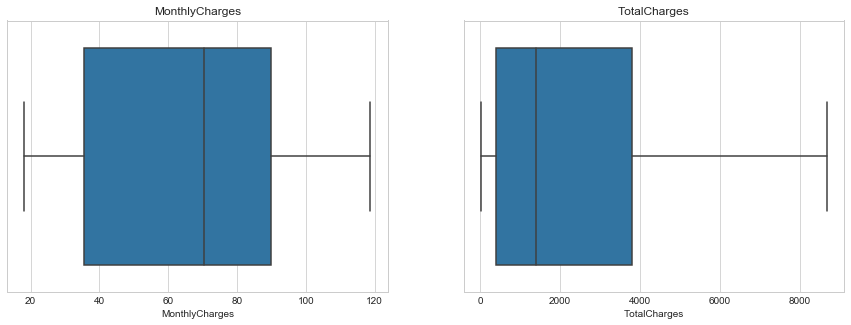

In [16]:
plt.style.use("seaborn-whitegrid")
fig, ax  = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot("MonthlyCharges", data= telco_1, ax = ax[0])
sns.boxplot("TotalCharges", data= telco_1, ax = ax[1])
ax[0].set_title("MonthlyCharges") # Using Boxplots to visualize outliers
ax[1].set_title("TotalCharges")# total charges are rightly skewed but as with summary stats no concerning outliers

## Handling missing values

C:\Users\shehz\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shehz\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribution of TotalCharges')

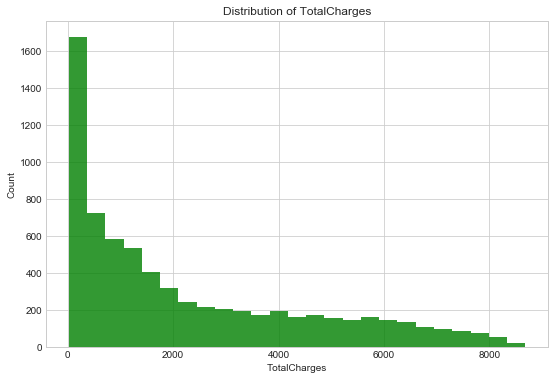

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (9,6))
plt.style.use("seaborn-whitegrid")
ax.hist(telco_1["TotalCharges"], bins = 25, alpha = 0.8, color = "g")
ax.set_xlabel("TotalCharges")
ax.set_ylabel("Count")
ax.set_title("Distribution of TotalCharges") # distribution looks smooth, no outlier problem, might need to scale for model
# most people have a lower total charge, are most people leaving the service early?

In [18]:
telco_1.TotalCharges.isnull().sum() # showed 11 missing values after nans recorded correctly

11

In [19]:
def impute_miss(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)

In [20]:
telco_2 = telco_1.copy()

In [21]:
median_tc = telco_2['TotalCharges'].median() #calculate median
median_tc

1397.475

In [22]:
impute_miss(telco_2, 'TotalCharges', median_tc)

In [23]:
telco_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_median
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1889.50
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65


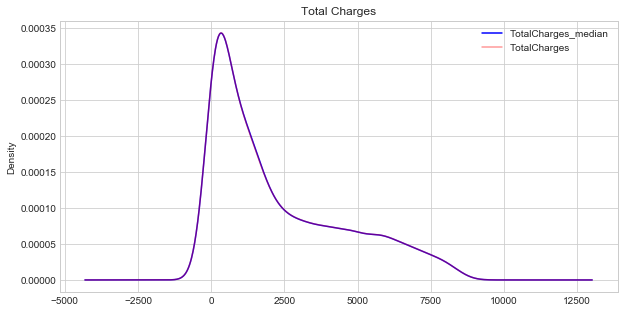

In [24]:
plt.style.use("seaborn-whitegrid")
fig, ax  = plt.subplots(1, 1, figsize = (10, 5))
telco_2['TotalCharges_median'].plot(kind = 'kde', ax = ax, color = 'blue')
telco_2['TotalCharges'].plot(kind = 'kde', ax = ax, color = 'red', alpha = 0.4)
ax.set_title("Total Charges") 
ax.legend(loc='best') # negligible amount of missing values here with no effect on the distribution
# median will work well

In [25]:
telco_2.isnull().sum() # great

customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges           11
Churn                   0
TotalCharges_median     0
dtype: int64

## Missing Data Imputation Summary

- Only one feature(TotalCharges) showed a negligible amount of missingness
- Median was used for imputation as the feature distriubtion was skewed

## Exploratory Data Analysis

The focus will be the relationships between our independent and dependent variable here

In [26]:
telco_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID             7043 non-null object
gender                 7043 non-null object
SeniorCitizen          7043 non-null object
Partner                7043 non-null object
Dependents             7043 non-null object
tenure                 7043 non-null int64
PhoneService           7043 non-null object
MultipleLines          7043 non-null object
InternetService        7043 non-null object
OnlineSecurity         7043 non-null object
OnlineBackup           7043 non-null object
DeviceProtection       7043 non-null object
TechSupport            7043 non-null object
StreamingTV            7043 non-null object
StreamingMovies        7043 non-null object
Contract               7043 non-null object
PaperlessBilling       7043 non-null object
PaymentMethod          7043 non-null object
MonthlyCharges         7043 non-null float64
TotalCharges           7032 non-null float64
Churn       

In [27]:
# Seems Like Customer Id has Hi variance and can be dropped it won't add value to our model
# We have a few categorical columns that will need to be encoded
# Phone service and Internet service have their own features, so related features can be encoded accordingly
#Churn is our Target variable

In [28]:
obj_cat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup',
          'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling',
           'Churn', 'SeniorCitizen', 'Contract', 'OnlineSecurity', 'PaymentMethod']
for colname in obj_cat:
    telco_2[colname] = telco_1[colname].astype('category') 

Text(0.5, 1.0, 'Churn Counts')

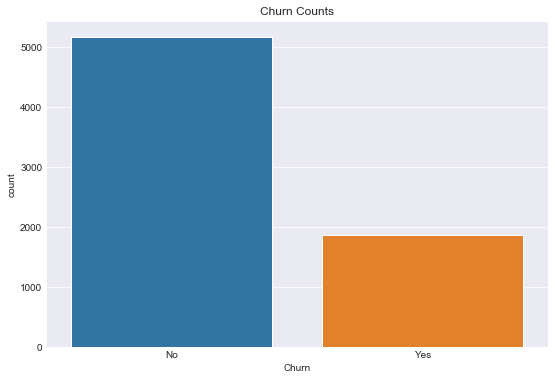

In [29]:
plt.figure(figsize = (9,6))
sns.set_style("darkgrid")
sns.countplot('Churn', data=telco_1)
plt.title("Churn Counts")
#no values are higher here so an imbalance is present but we do have a decent percentage class representation

In [30]:
telco_2.Churn.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

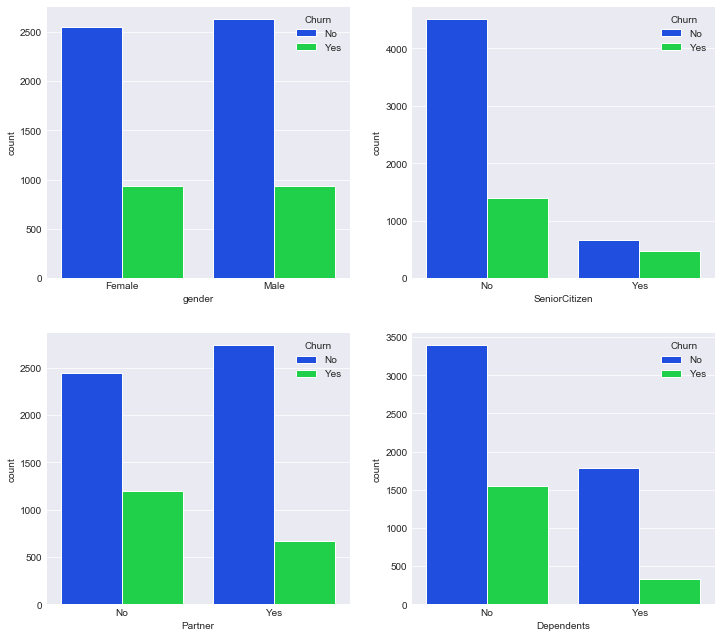

In [31]:
plt.style.use("seaborn-bright")
plt.figure(figsize=(12, 11))
plt.subplot(2, 2, 1)
sns.countplot('gender', data=telco_2, hue='Churn') # gender does not seem to have much influence, might drop
plt.subplot(2, 2, 2)
sns.countplot('SeniorCitizen', data=telco_2, hue='Churn')# more senior citizens tend to churn, due to age some might be deceased
plt.subplot(2, 2, 3)
sns.countplot('Partner', data=telco_2, hue='Churn') # People with no partner tend to churn more, interesting
plt.subplot(2, 2, 4)
sns.countplot('Dependents', data=telco_2, hue='Churn')# Slight difference with Dependents as well

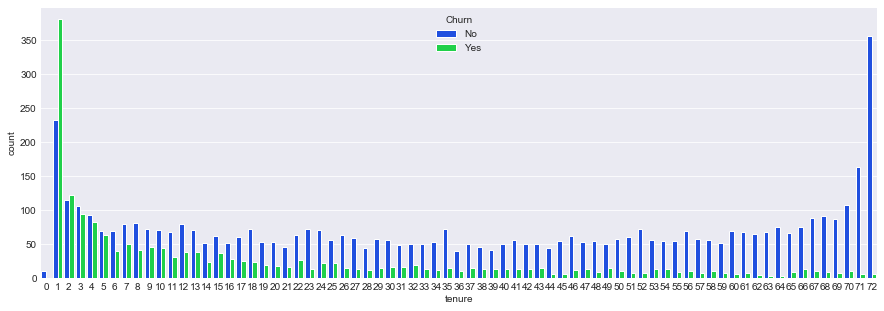

In [32]:
plt.figure(figsize = (15,5))
sns.countplot('tenure', data=telco_2, hue='Churn') # Churn looks like it decreases over tenure, great some variation
# High amounts of churn in the beginning of the customer life cycle

In [33]:
def tenure_b(telco_2) :
    
    if telco_2["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telco_2["tenure"] > 12) & (telco_2["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telco_2["tenure"] > 24) & (telco_2["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telco_2["tenure"] > 48) & (telco_2["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telco_2["tenure"] > 60 :
        return "Tenure_gr_60"
telco_2["tenure_buckets"] = telco_2.apply(lambda telco_2:tenure_b(telco_2),
                                      axis = 1) # Create buckets for tenure for better visuals and categories

In [34]:
telco_2['tenure_buckets'] = telco_2.tenure_buckets.astype("category") #to show up in order on graph

Text(0.5, 1.0, 'Churn and Tenure Relation')

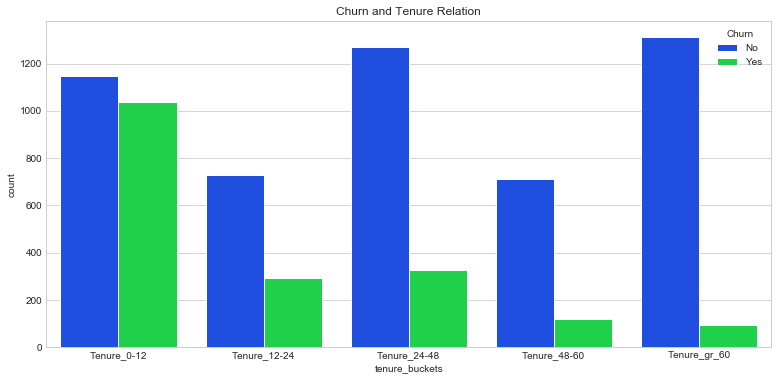

In [35]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize = (13,6))
sns.countplot('tenure_buckets', data=telco_2, hue='Churn')
plt.title("Churn and Tenure Relation") # Decreasing churn over tenure

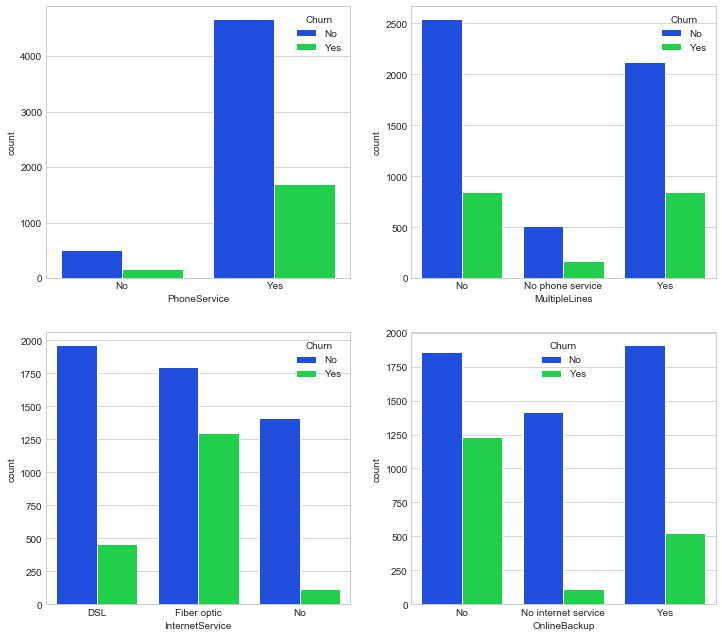

In [36]:
plt.style.use("seaborn-bright")
plt.figure(figsize=(12, 11))
plt.subplot(2, 2, 1)
sns.countplot('PhoneService', data=telco_2, hue='Churn') #majority have phone service not much variation
plt.subplot(2, 2, 2)
sns.countplot('MultipleLines', data=telco_2, hue='Churn')# not a major pattern here
plt.subplot(2, 2, 3)
sns.countplot('InternetService', data=telco_2, hue='Churn')# people with fiber optic service tend to churn*
plt.subplot(2, 2, 4)
sns.countplot('OnlineBackup', data=telco_2, hue='Churn') # no backup tends to churn more. 
#Less churn with more services could be a takeaway but relationships are not strong

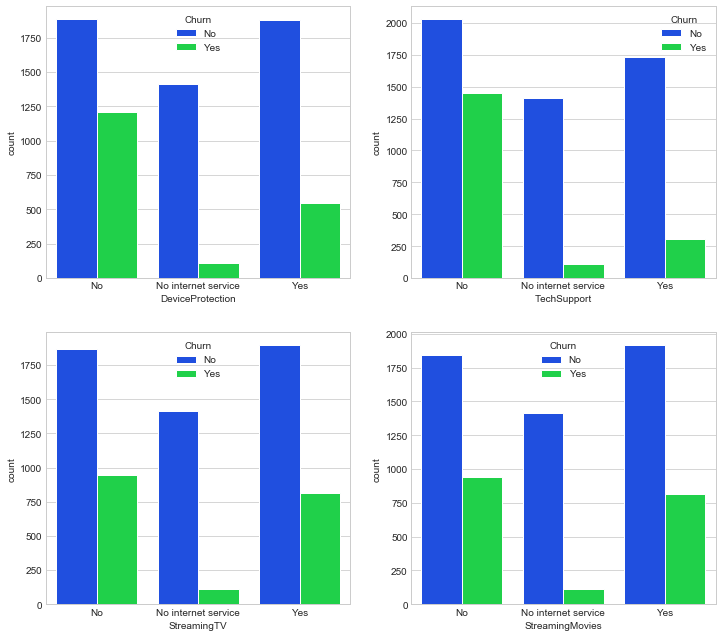

In [37]:
plt.style.use("seaborn-bright")
plt.figure(figsize=(12, 11))
plt.subplot(2, 2, 1)
sns.countplot('DeviceProtection', data=telco_2, hue='Churn') # people with no device protection tend to churn more
plt.subplot(2, 2, 2)
sns.countplot('TechSupport', data=telco_2, hue='Churn')# no tech support tends to churn more
plt.subplot(2, 2, 3)
sns.countplot('StreamingTV', data=telco_2, hue='Churn')
plt.subplot(2, 2, 4)
sns.countplot('StreamingMovies', data=telco_2, hue='Churn') # signing people up for more services decreases churn
# the more invested a client is the less they tend to churn
# Device protection and tech support maybe factors here in decreasing churn levels

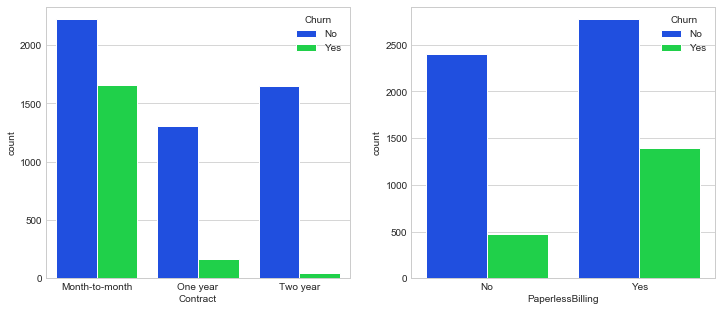

In [38]:
plt.style.use("seaborn-bright")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot('Contract', data=telco_2, hue='Churn') # Month to monthers churn more
plt.subplot(1, 2, 2)
sns.countplot('PaperlessBilling', data=telco_2, hue='Churn') # There is some variation here as well

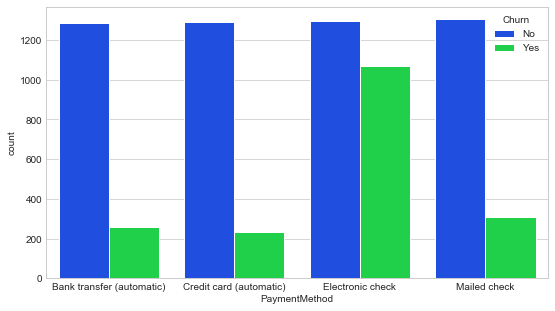

In [39]:
plt.figure(figsize = (9,5))
plt.subplot(1, 1, 1)
sns.countplot('PaymentMethod', data=telco_2, hue='Churn') # echecks tend to churn more

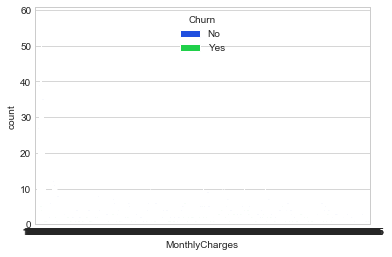

In [40]:
plt.subplot(1, 1, 1)
sns.countplot('MonthlyCharges', data=telco_2, hue='Churn')# will need to transform or place in buckets. 

In [41]:
def Month_b(telco_2) :
    
    if telco_2["MonthlyCharges"] <= 20 :
        return '20'
    elif (telco_2["MonthlyCharges"] > 20) & (telco_2["MonthlyCharges"] <= 40 ):
        return '20-40'
    elif (telco_2["MonthlyCharges"] > 40) & (telco_2["MonthlyCharges"] <= 60) :
        return '40-60'
    elif (telco_2["MonthlyCharges"] > 60) & (telco_2["MonthlyCharges"] <= 80) :
        return '60-80'
    elif (telco_2["MonthlyCharges"] > 80) & (telco_2["MonthlyCharges"] <= 100) :
        return '80-100'
    elif (telco_2["MonthlyCharges"] > 100) & (telco_2["MonthlyCharges"] <= 120):  
        return '100-120' 
telco_2["Monthly_buckets"] = telco_2.apply(lambda telco_2:Month_b(telco_2),
                                      axis = 1) 

In [42]:
telco_2['Monthly_buckets'] = telco_2.Monthly_buckets.astype("category") #to show up in order on graph

Text(0.5, 1.0, 'Monthly Charges and Churn')

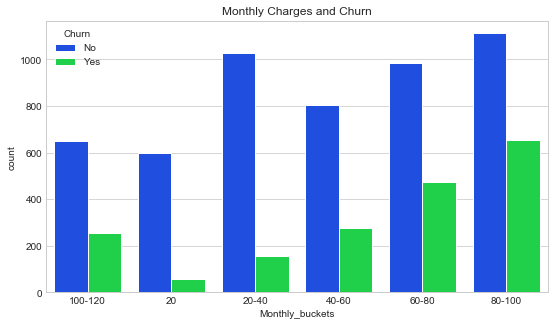

In [43]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize = (9,5))
plt.subplot(1, 1, 1)
sns.countplot('Monthly_buckets', data=telco_2, hue='Churn')
plt.title("Monthly Charges and Churn") #Churn tends to increase with monthly price, customers might find better deals elsewhere

In [44]:
def Total_b(telco_2) :
    
    if telco_2["TotalCharges"] <= 250 :
        return 250
    elif (telco_2["TotalCharges"] > 250) & (telco_2["TotalCharges"] <= 500 ):
        return 500
    elif (telco_2["TotalCharges"] > 500) & (telco_2["TotalCharges"] <= 750) :
        return 750
    elif (telco_2["TotalCharges"] > 750) & (telco_2["TotalCharges"] <= 1000) :
        return 1000
    elif (telco_2["TotalCharges"] > 1000) & (telco_2["TotalCharges"] <= 1500) :
        return 1500
    elif (telco_2["TotalCharges"] > 1500) & (telco_2["TotalCharges"] <= 2500):  
        return 2500  
    elif (telco_2["TotalCharges"] > 2500) & (telco_2["TotalCharges"] <= 3500):  
        return 3500 
    elif (telco_2["TotalCharges"] > 3500) & (telco_2["TotalCharges"] <= 4500):  
        return 4500 
    elif (telco_2["TotalCharges"] > 4500) & (telco_2["TotalCharges"] <= 5500):  
        return 5500 
    elif (telco_2["TotalCharges"] > 5500) & (telco_2["TotalCharges"] <= 6500):  
        return 6500 
    elif (telco_2["TotalCharges"] > 6500) & (telco_2["TotalCharges"] <= 7500):  
        return 7500 
    elif (telco_2["TotalCharges"] > 7500) & (telco_2["TotalCharges"] <= 9000):  
        return 9000 
telco_2["Total_buckets"] = telco_2.apply(lambda telco_2:Total_b(telco_2),
                                      axis = 1) 

In [45]:
telco_2['Total_buckets'] = telco_2.Total_buckets.astype("category") #to show up in order on graph

Text(0.5, 1.0, 'Total Charges and Churn')

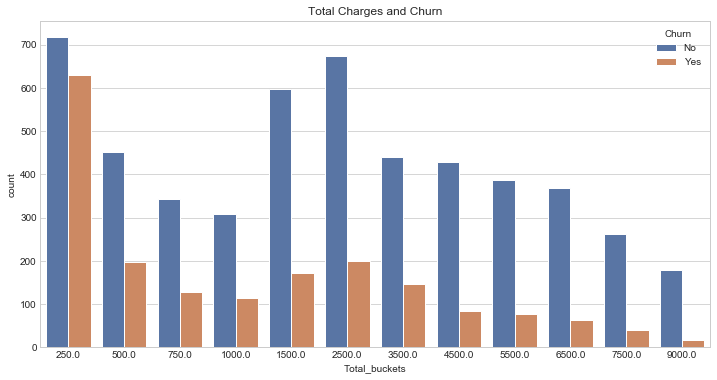

In [46]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize = (12,6))
plt.subplot(1, 1, 1)
sns.countplot('Total_buckets', data=telco_2, hue='Churn', alpha = 1, palette = 'deep')
plt.title("Total Charges and Churn")# wow lots of churn from 0-250 then an increase around 2500
# the beginning of the customers lifecycle is key here to preventing churn
#numericals are providing good variation

## Quick Summary of EDA

- Some relationships are present between our dependent and independent variables(Longer contracts, tech support, device protection and clients signed up with more services lead to less churn levels)
- There are limitations to the relationships and specific indentifiers of customers who churn might not be consistent enough
- The imbalance in our Target variable might pose some issues in model building as well

## Feature Engineering

In [47]:
telco_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
customerID             7043 non-null object
gender                 7043 non-null category
SeniorCitizen          7043 non-null category
Partner                7043 non-null category
Dependents             7043 non-null category
tenure                 7043 non-null int64
PhoneService           7043 non-null category
MultipleLines          7043 non-null category
InternetService        7043 non-null category
OnlineSecurity         7043 non-null category
OnlineBackup           7043 non-null category
DeviceProtection       7043 non-null category
TechSupport            7043 non-null category
StreamingTV            7043 non-null category
StreamingMovies        7043 non-null category
Contract               7043 non-null category
PaperlessBilling       7043 non-null category
PaymentMethod          7043 non-null category
MonthlyCharges         7043 non-null float64
TotalCharges           70

In [48]:
telco_2.nunique()

customerID             7043
gender                    2
SeniorCitizen             2
Partner                   2
Dependents                2
tenure                   73
PhoneService              2
MultipleLines             3
InternetService           3
OnlineSecurity            3
OnlineBackup              3
DeviceProtection          3
TechSupport               3
StreamingTV               3
StreamingMovies           3
Contract                  3
PaperlessBilling          2
PaymentMethod             4
MonthlyCharges         1585
TotalCharges           6530
Churn                     2
TotalCharges_median    6531
tenure_buckets            5
Monthly_buckets           6
Total_buckets            12
dtype: int64

In [49]:
telco_3 = telco_2.copy()

In [50]:
telco_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_median,tenure_buckets,Monthly_buckets,Total_buckets
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,Tenure_0-12,20-40,250.0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,1889.50,Tenure_24-48,40-60,2500.0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15,Tenure_0-12,40-60,250.0
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75,Tenure_24-48,40-60,2500.0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65,Tenure_0-12,60-80,250.0


In [51]:
telco_3 = telco_3.drop(['customerID', 'tenure_buckets', 
                        'Monthly_buckets', 
                        'Total_buckets', 'TotalCharges'], axis = 1) #drop high cardinality feature and created columns

In [52]:
telco_3.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges_median
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.65


In [53]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telco_3[i]  = telco_3[i].replace({'No internet service' : 'No'})# Internet service has it's own column so it is represented

In [54]:
telco_3.nunique()

gender                    2
SeniorCitizen             2
Partner                   2
Dependents                2
tenure                   73
PhoneService              2
MultipleLines             3
InternetService           3
OnlineSecurity            2
OnlineBackup              2
DeviceProtection          2
TechSupport               2
StreamingTV               2
StreamingMovies           2
Contract                  3
PaperlessBilling          2
PaymentMethod             4
MonthlyCharges         1585
Churn                     2
TotalCharges_median    6531
dtype: int64

In [55]:
telco_3["MultipleLines"].unique()

[No phone service, No, Yes]
Categories (3, object): [No phone service, No, Yes]

In [56]:
telco_3["InternetService"].unique()

[DSL, Fiber optic, No]
Categories (3, object): [DSL, Fiber optic, No]

In [57]:
telco_3["MultipleLines"]  = telco_3["MultipleLines"].replace({'No phone service' : 'No'})
#Phone Service has it's own column, drop

In [58]:
telco_4 = telco_3.copy()

In [59]:
telco_4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges_median
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.65


In [60]:
replace_cols = [ 'Partner', 'SeniorCitizen', 'Dependents',
                'PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection',
                'TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling', 'Churn']
for i in replace_cols : 
    telco_4[i]  = telco_4[i].replace({'Yes' : 1, 'No' : 0}) #Binary features can be encoded with 0 and 1

In [61]:
telco_4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges_median
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0,29.85
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0,1889.50
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1,108.15
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0,1840.75
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1,151.65


In [62]:
telco_4["gender"] = telco_4["gender"].replace({'Male':1, 'Female':0})  

In [63]:
telco_4.head()# Nice and clean just have to get dummies for the rest and normalize numericals

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges_median
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0,29.85
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0,1889.50
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1,108.15
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0,1840.75
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1,151.65


In [64]:
dummy_col = ['InternetService', 'Contract', 'PaymentMethod'] #drop first dummy aswell
telco_5 = pd.get_dummies(telco_4, columns=dummy_col, drop_first = True, dtype='uint8') 

In [65]:
telco_5.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,Churn,TotalCharges_median,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,0,29.85,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,0,1889.50,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,1,108.15,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,0,1840.75,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,1,151.65,1,0,0,0,0,1,0


In [66]:
telco_7 = telco_5.copy()

In [67]:
telco_7.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,Churn,TotalCharges_median,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,0,29.85,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,0,1889.50,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,1,108.15,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,0,1840.75,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,1,151.65,1,0,0,0,0,1,0


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
telco_7[['tenure', 'MonthlyCharges', 'TotalCharges_median']] = scaler.fit_transform(telco_7[['tenure',
                                                                                      'MonthlyCharges', 'TotalCharges_median']])

In [69]:
telco_7[['tenure', 'MonthlyCharges', 'TotalCharges_median']].head()# Scaled for better model performance

,tenure,MonthlyCharges,TotalCharges_median
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


In [70]:
telco_7.drop_duplicates(inplace=True) # Drop duplicates if there are any

In [71]:
telco_7.shape

(7021, 24)

## Feature Tranformation Summary

- Binary Categorical features encoded with 0 and 1
- Features with more labels encoded with dummy variables
- Numerical features were scaled accordingly
- Potential duplicate values were dropped

## Feature selection
#### Correlation of variables

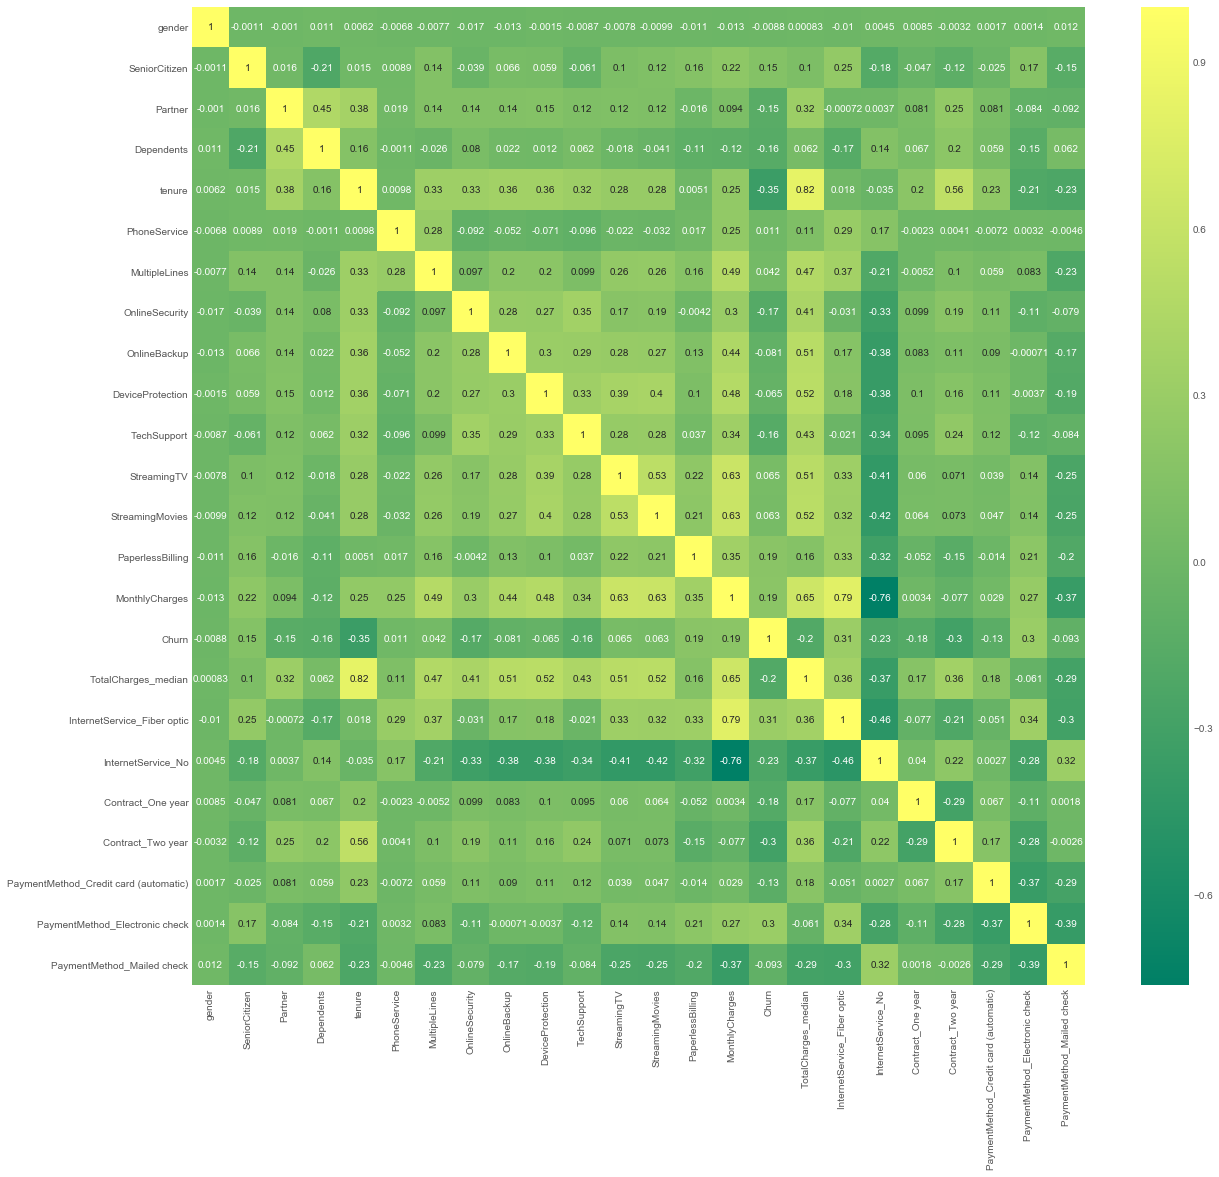

In [72]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 18))
sns.heatmap(telco_7.corr(), annot = True, cmap = 'summer')
#totalCharges/tenure
#internet service fiber optic/montly charges
#internet servic no/monthly charges

- Mutual information for classification was attempted for feature selection but correlation which is cheaper computationally works great in this instance
- The correlation matrix will allow us to drop highly correlated features which will address the multicollinearity assumption of Logistic regression as well
- This data represents individual observations from different customers, no resampling has been done. 
- Continuous variables will be dropped based on correllation matrix after first iteration of model so linearity of (continous) independent variables and log odds not applicable

## Model Building

In [73]:
#Splitting Data using Train Test Split to prevent overfitting

In [74]:
X = telco_7.drop('Churn', axis = 'columns')
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges_median,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,...,1,0.115423,0.001275,0,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,...,0,0.385075,0.215867,0,0,1,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,...,1,0.354229,0.010310,0,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,...,0,0.239303,0.210241,0,0,1,0,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,...,1,0.521891,0.015330,1,0,0,0,0,1,0


In [75]:
y = telco_7['Churn']
y.head() 

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [77]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges_median,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4934,0,0,1,0,1.000000,1,1,1,1,1,...,1,0.920398,0.892326,1,0,0,1,0,1,0
3812,1,0,0,0,0.236111,1,0,0,0,0,...,1,0.013930,0.038397,0,1,1,0,0,0,0
5685,1,0,1,1,0.625000,1,0,0,0,0,...,0,0.009453,0.102112,0,1,0,1,0,1,0
3554,0,0,0,1,0.097222,1,0,0,0,0,...,1,0.525373,0.052371,1,0,0,0,0,1,0
3891,1,0,1,0,0.583333,1,1,1,0,0,...,0,0.376617,0.273258,0,0,1,0,1,0,0


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

## Logistic Regression Intro

-  Classification Algorithm that works best for binary classication but can be used for multiclass classification
-  Uses sigmoid/logit activation function to create regression line that is not linear to fit for classification
-  This function creates a sigmoid shaped curve with an output of not greater than 1 and not less than 0
-  Outcomes are displayed as probabilities 
-  Employs its own logistic regression cost function with a convergence function to find global minima(Gradient Descent)

## Assumptions

- Logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.
- Logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.
- Logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.
- Outliers should not be strongly influential
- Large sample sizes are more condusive

In [79]:
from yellowbrick.classifier import ClassificationReport

In [80]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred = lr1.predict(X_test)

In [82]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1379  159]
 [ 252  317]]
0.804935927859516
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1538
           1       0.67      0.56      0.61       569

    accuracy                           0.80      2107
   macro avg       0.76      0.73      0.74      2107
weighted avg       0.80      0.80      0.80      2107



In [83]:
visualizer = ClassificationReport(lr1, classes = ['Stayed','Churned'], support = True) #visually representing the report

C:\Users\shehz\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


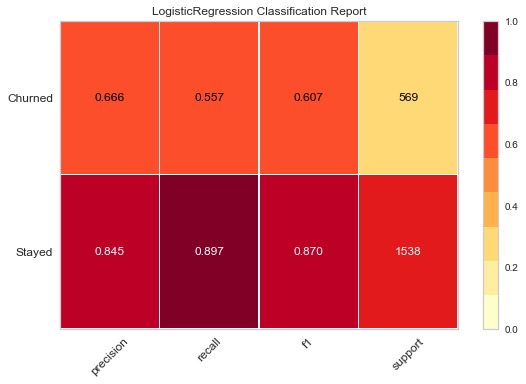

In [84]:
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [85]:
A = telco_7.drop(['Churn', 'MonthlyCharges', 'TotalCharges_median','gender'], axis = 'columns')
A.head()# feature columns that create noise are discarded
#Gender was discarded based on previous EDA
#this also awould address any possibility of Linearity of independent variables and log odds

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.013889,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0.472222,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0.027778,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0.625000,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0


In [86]:
b = telco_7['Churn']
b.head() 

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [87]:
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size = 0.3, random_state = 10)

In [88]:
lr2 = LogisticRegression()

In [89]:
lr2.fit(A_train, b_train)

LogisticRegression()

In [90]:
b_pred = lr2.predict(A_test)

In [91]:
print(confusion_matrix(b_test,b_pred))
print(accuracy_score(b_test, b_pred))
print(classification_report(b_test, b_pred))

[[1380  158]
 [ 253  316]]
0.804935927859516
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1538
           1       0.67      0.56      0.61       569

    accuracy                           0.80      2107
   macro avg       0.76      0.73      0.74      2107
weighted avg       0.80      0.80      0.80      2107



In [92]:
b_train.value_counts() #There is an imbalance here that we can address with some parameter tuning

0    3626
1    1288
Name: Churn, dtype: int64

In [93]:
b_test.value_counts()

0    1538
1     569
Name: Churn, dtype: int64

In [94]:
class_weight = dict({0:1, 1:1.75}) #we tried various class weight options to address class imbalance

In [110]:
lr3 = LogisticRegression(class_weight= 'balanced')
# Balanced class weight assists with imbalanced datasets by giving higher weights to the minority class

In [111]:
lr3.fit(A_train, b_train)

LogisticRegression(class_weight='balanced')

In [112]:
b2_pred = lr3.predict(A_test)

In [113]:
print(confusion_matrix(b_test,b2_pred))
print(accuracy_score(b_test, b2_pred))
print(classification_report(b_test, b2_pred))
# this method does affect accuracy score but recall is improved

[[1115  423]
 [ 104  465]]
0.7498813478879924
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1538
           1       0.52      0.82      0.64       569

    accuracy                           0.75      2107
   macro avg       0.72      0.77      0.72      2107
weighted avg       0.81      0.75      0.76      2107



In [99]:
lr4 = LogisticRegression(solver = 'liblinear') #parameter tuning
grid = {'C': 10.0**np.arange(-3,3), 'penalty':['l1','l2']}
# penalty refers to applying l1 and l2 regularization techniques to prevent overfitting
# C Value: Invers of regularization strength
cv = KFold(n_splits = 5, shuffle = False, random_state = None) #Kfold cross validation

### Kfold Cross Validation

- Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. 

- In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

In [100]:
clf = GridSearchCV(lr4, grid, cv = cv, n_jobs = -1, scoring = 'f1_macro')

In [101]:
clf.fit(A_train,b_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [102]:
print(clf.best_params_)

{'C': 0.1, 'penalty': 'l1'}


In [103]:
b3_pred = clf.predict(A_test)

In [104]:
cm = confusion_matrix(b_test,b3_pred, labels = clf.classes_)
print(confusion_matrix(b_test,b3_pred))
print(accuracy_score(b_test, b3_pred))
print(classification_report(b_test, b3_pred)) 
#accuracy of 80%
#precision and recall of churned values low
# False positives and False negatives can be reduced

[[1388  150]
 [ 256  313]]
0.8073089700996677
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1538
           1       0.68      0.55      0.61       569

    accuracy                           0.81      2107
   macro avg       0.76      0.73      0.74      2107
weighted avg       0.80      0.81      0.80      2107



In [105]:
from sklearn.metrics import ConfusionMatrixDisplay

In [106]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)

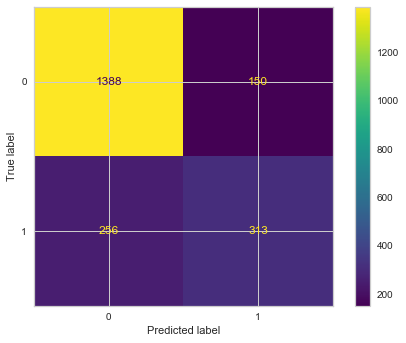

In [107]:
disp.plot()
plt.show()

In [108]:
visualizer = ClassificationReport(clf, classes = ['Stayed','Churned'], support = True) #visually representing the report

C:\Users\shehz\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


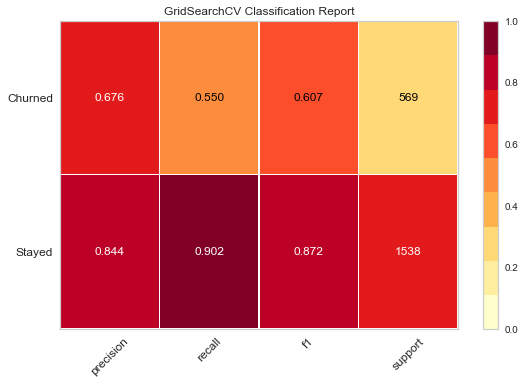

In [109]:
visualizer.fit(A_train, b_train)
visualizer.score(A_test, b_test)
visualizer.show()

## Logistic Regression Evaluation Summary

 - After feature selection and hyper parameter tuning using GridDearch CV, the best accuracy score achieved was **80%**
 - An F1 macro score of **74%** is a better indicator in this instance.
 - The dataset was imbalanced in nature and accuracy score is not a good measure for model performance. One can be mislead
 - We did try and address the imbalance by adjusting the class weight parameter, this method did affect precision and recall but was unsuccessful, other techniques can be applied, e.g. SMOTE
 - Ideally we would like to improve the precision or recall score for the less represented dependent variable here(1/Churned: Yes), this values sits at **68%** and **55%** respectively
 - Domain Knowledge will determine whether the reduction of False Positives(precision) or False Negatives(recall) prove more important
 - I would request further data with regards to observations and add features that contribute to the model building process
    

# END